# COVID-19 country-wise trend forcasting (new daily cases) #

In [9]:
# References :
#
# Facebook Prophet : https://facebook.github.io/prophet/docs/quick_start.html#python-api
# Data Source : https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv
# Trend Flexibility : https://facebook.github.io/prophet/docs/trend_changepoints.html#automatic-changepoint-detection-in-prophet

In [10]:
# Inital Parameter 1 :
#
# Set data source from URL
data_source = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
# Set data source from local disk
# data_source = 'owid-covid-data.csv'

In [11]:
# Inital Parameter 2 :
#
# Select Country
show_country = 'India'

In [12]:
# Inital Parameter 3 :
#
# Adjusting trend flexibility
trend_flexibility = 1.0

In [13]:
# Inital Parameter 4 :
#
# Set number of forcasting days
days_forcasting = 10

In [14]:
# Inital Parameter 5 :
#
# Set number of previous days to be considered for forcasting
last_days_count = 30

In [15]:
# !pip install pystan==2.19.1.1

# !pip install prophet

In [16]:
# Import Pandas
import pandas as pd
# Import Facebook Prophet
from prophet import Prophet
# Import Plotly
from prophet.plot import plot_plotly
import plotly.offline as py
# Initialise Plotly
py.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# Read data to a DataFrame
df_read = pd.read_csv(data_source)

In [18]:
# Show a list of available countries which can be set at "Inital Parameter 2"
country_list = set(df_read.location)
print(country_list)

{'Malaysia', 'Saint Helena', 'Ecuador', 'Estonia', 'Vatican', 'Aruba', 'Northern Cyprus', 'Ghana', 'Nicaragua', 'Chad', 'Slovenia', 'Venezuela', 'Taiwan', 'Uruguay', 'Brunei', 'French Polynesia', 'Sweden', 'Kazakhstan', 'Mauritius', 'Pitcairn', 'Dominica', 'Botswana', 'Georgia', 'Brazil', 'Turks and Caicos Islands', 'Iraq', 'Cook Islands', 'Russia', 'Indonesia', 'Bangladesh', 'Slovakia', 'Falkland Islands', 'Isle of Man', 'San Marino', 'Jamaica', 'Niue', 'Norway', 'Cyprus', 'Belgium', 'Sint Maarten (Dutch part)', 'Bahamas', 'Wallis and Futuna', 'Mexico', 'Iceland', 'Gibraltar', 'Mali', 'Guatemala', 'Guinea', 'Kenya', 'South Korea', 'United States', 'Belarus', "Cote d'Ivoire", 'Burundi', 'Oceania', 'Central African Republic', 'Lebanon', 'Samoa', 'South Sudan', 'Uzbekistan', 'Togo', 'Andorra', 'Laos', 'Lesotho', 'Barbados', 'Anguilla', 'Peru', 'Myanmar', 'Tajikistan', 'China', 'Philippines', 'Kyrgyzstan', 'Tonga', 'Dominican Republic', 'Denmark', 'Eritrea', 'Bermuda', 'Marshall Islands',

In [19]:
# Show all available data fields
df_read.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [20]:
# Filter data relevant to selected country
df_filter = df_read[df_read.location.isin([show_country])]

In [21]:
# Show a sample of selected data
df_filter.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
42294,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42295,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42296,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42297,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42298,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [22]:
# Extract data - only 'date' and 'new_cases'
df_extracted = df_filter[['date','new_cases']]

In [23]:
# Convert data into Facebook Prophet format
df_extracted = df_extracted.rename(columns={'date': 'ds', 'new_cases': 'y'})
df_extracted = df_extracted.tail(last_days_count)

In [24]:
# Show a sample of converted selected data (first 5)
df_extracted.head()

,ds,y
42795,2021-06-14,60471.0
42796,2021-06-15,62224.0
42797,2021-06-16,67208.0
42798,2021-06-17,62480.0
42799,2021-06-18,60753.0


In [25]:
# Show last 5 available dates
df_extracted.tail()

,ds,y
42820,2021-07-09,42766.0
42821,2021-07-10,41506.0
42822,2021-07-11,37154.0
42823,2021-07-12,0.0
42824,2021-07-13,71771.0


In [26]:
# Show number of available dates
total_dates = df_extracted.shape[0]
print('Total number of available dates: ' + str(total_dates))

Total number of available dates: 30


In [27]:
# Initialise Facebook Prophet
m = Prophet(changepoint_prior_scale=trend_flexibility , yearly_seasonality=True , daily_seasonality=True) 
# Fitting data
m.fit(df_extracted)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [28]:
# Create future forcasting dates
future = m.make_future_dataframe(periods=days_forcasting)

In [29]:
# Show last 5 forcasting dates
future.tail()

,ds
35,2021-07-19
36,2021-07-20
37,2021-07-21
38,2021-07-22
39,2021-07-23


In [30]:
# Predict daily case number for future forcasting dates
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

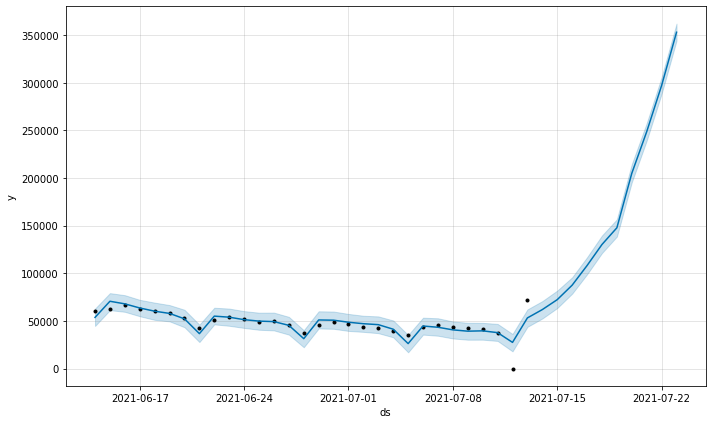

In [31]:
# Plot past and forcasted data
fig1 = m.plot(forecast)

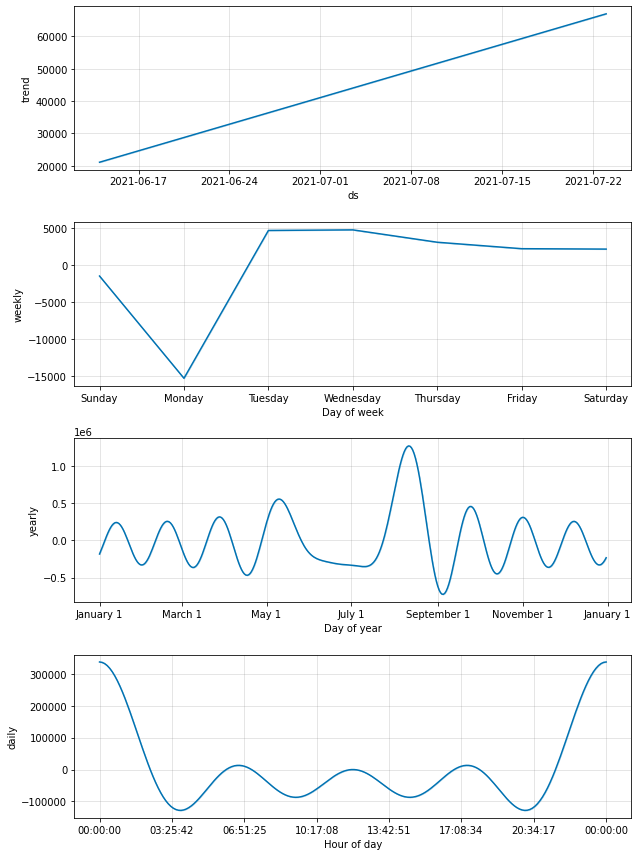

In [32]:
# Plot past and forcasted data as components
fig2 = m.plot_components(forecast)

In [33]:
# Plot past and forcasted data in an interactive plot
fig = plot_plotly(m, forecast)
py.iplot(fig)